In [1]:
import numpy as np
import matplotlib.lines as mlines
from matplotlib import pyplot as plt
from matplotlib.ticker import LogFormatter

In [2]:
CR_Trials_Proposed = np.load('../Algorithm/CR_Trials_Proposed.npy', allow_pickle=True)
CR_Trials_Abbasi = np.load('../Algorithm/CR_Trials_Abbasi.npy', allow_pickle=True)
CR_Trials_MOM = np.load('../Algorithm/CR_Trials_MOM.npy', allow_pickle=True)

In [3]:
# def prepare_plot_data(CR_Trials, iterations, trials):

#     x_value = np.array([i for i in range(iterations+1)])
#     y_value = np.zeros(iterations+1)

#     for i in range(iterations):

#         for T in range(trials):

#             y_value[i+1] += CR_Trials[T][1][i]

#     y_value = y_value / trials

#     return x_value, y_value

In [4]:
def prepare_plot_data(CR_Trials, iterations, trials):

    x_value = np.array([i for i in range(iterations+1)])
    y_value = np.zeros((trials, iterations+1))
    y_value[:, 1:] = np.array([CR_Trials[T][1] for T in range(trials)])

    return x_value, np.mean(y_value, axis=0), np.std(y_value, axis=0) / np.sqrt(trials)

In [5]:
trials = 100
iterations = 200
every_point = 25

In [6]:
x, y_Proposed, std_Proposed = prepare_plot_data(CR_Trials_Proposed, iterations, trials)
x, y_Abbasi, std_Abbasi = prepare_plot_data(CR_Trials_Abbasi, iterations, trials)
x, y_MOM, std_MOM = prepare_plot_data(CR_Trials_MOM, iterations, trials)

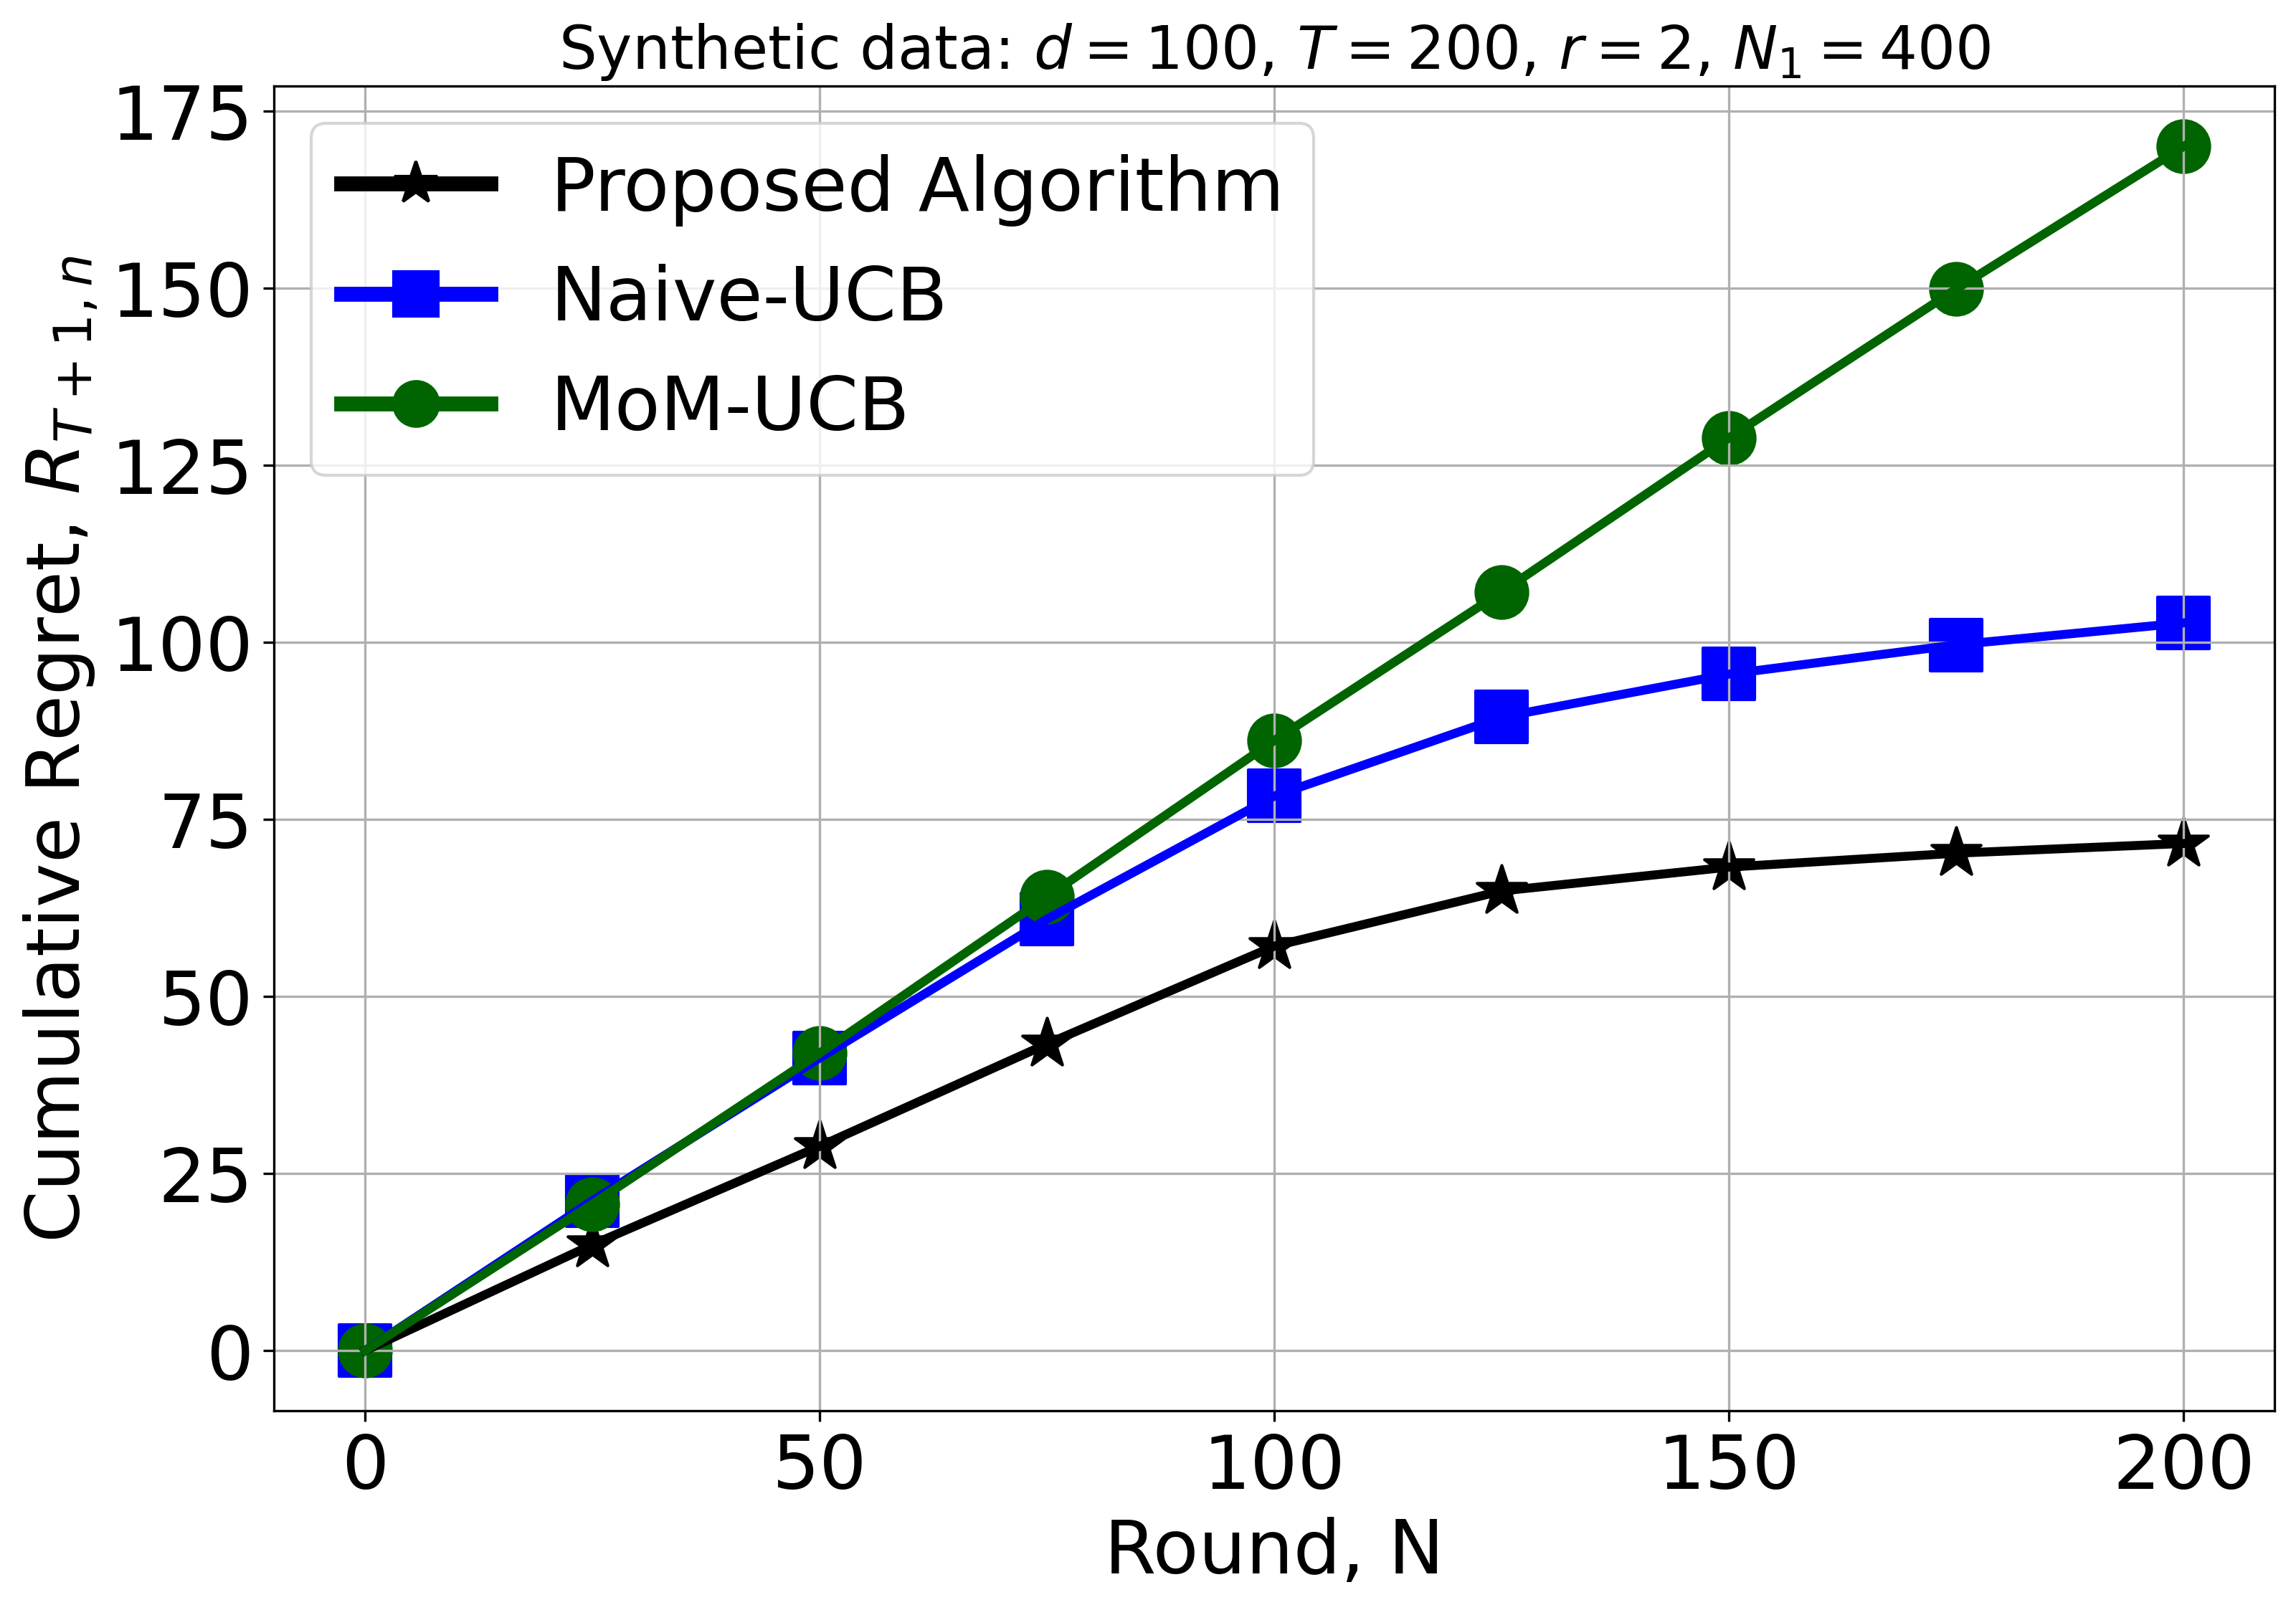

In [7]:
plt.figure(figsize=(12, 8), dpi = 300)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

colors = (['black', 'blue', 'darkgreen', 'purple', 'darkred', 'grey'])
markers = ['*', 's', 'o', 'X', '^', 'P']

plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rc('legend', fontsize = 25)

plt.plot(x[::every_point], y_Proposed[::every_point], color = colors[0], linewidth = 3, label = 'Proposed Algorithm')
plt.scatter(x[::every_point], y_Proposed[::every_point], marker = markers[0], color = colors[0], s = 300, label = 'Proposed Algorithm')
plt.plot(x[::every_point], y_Abbasi[::every_point], color = colors[1], linewidth = 3, label = 'Abbasi et al., 2011')
plt.scatter(x[::every_point], y_Abbasi[::every_point], marker = markers[1], color = colors[1], s = 300, label = 'Abbasi et al., 2011')
plt.plot(x[::every_point], y_MOM[::every_point], color = colors[2], linewidth = 3, label = 'MOM')
plt.scatter(x[::every_point], y_MOM[::every_point], marker = markers[2], color = colors[2], s = 300, label = 'MOM')

legend_elements = [mlines.Line2D([0], [0], color = colors[0], lw = 5, label = 'Proposed Algorithm', marker = markers[0], markersize = 15),
                   mlines.Line2D([0], [0], color = colors[1], lw = 5, label = 'Naive-UCB', marker = markers[1], markersize = 15),
                   mlines.Line2D([0], [0], color = colors[2], lw = 5, label = 'MoM-UCB', marker = markers[2], markersize = 15)]

plt.grid(True)
plt.xlabel('Round, N', fontsize = 25)
plt.ylabel(r'Cumulative Regret, $R_{T+1,n}$', fontsize = 25)
plt.legend(handles=legend_elements)
plt.title(r'Synthetic data: $d=100$, $T=200$, $r=2$, $N_1=400$', fontsize = 20)
# plt.savefig('meta_Synthetic.pdf', dpi = 600, bbox_inches = 'tight')
plt.show()
plt.close()

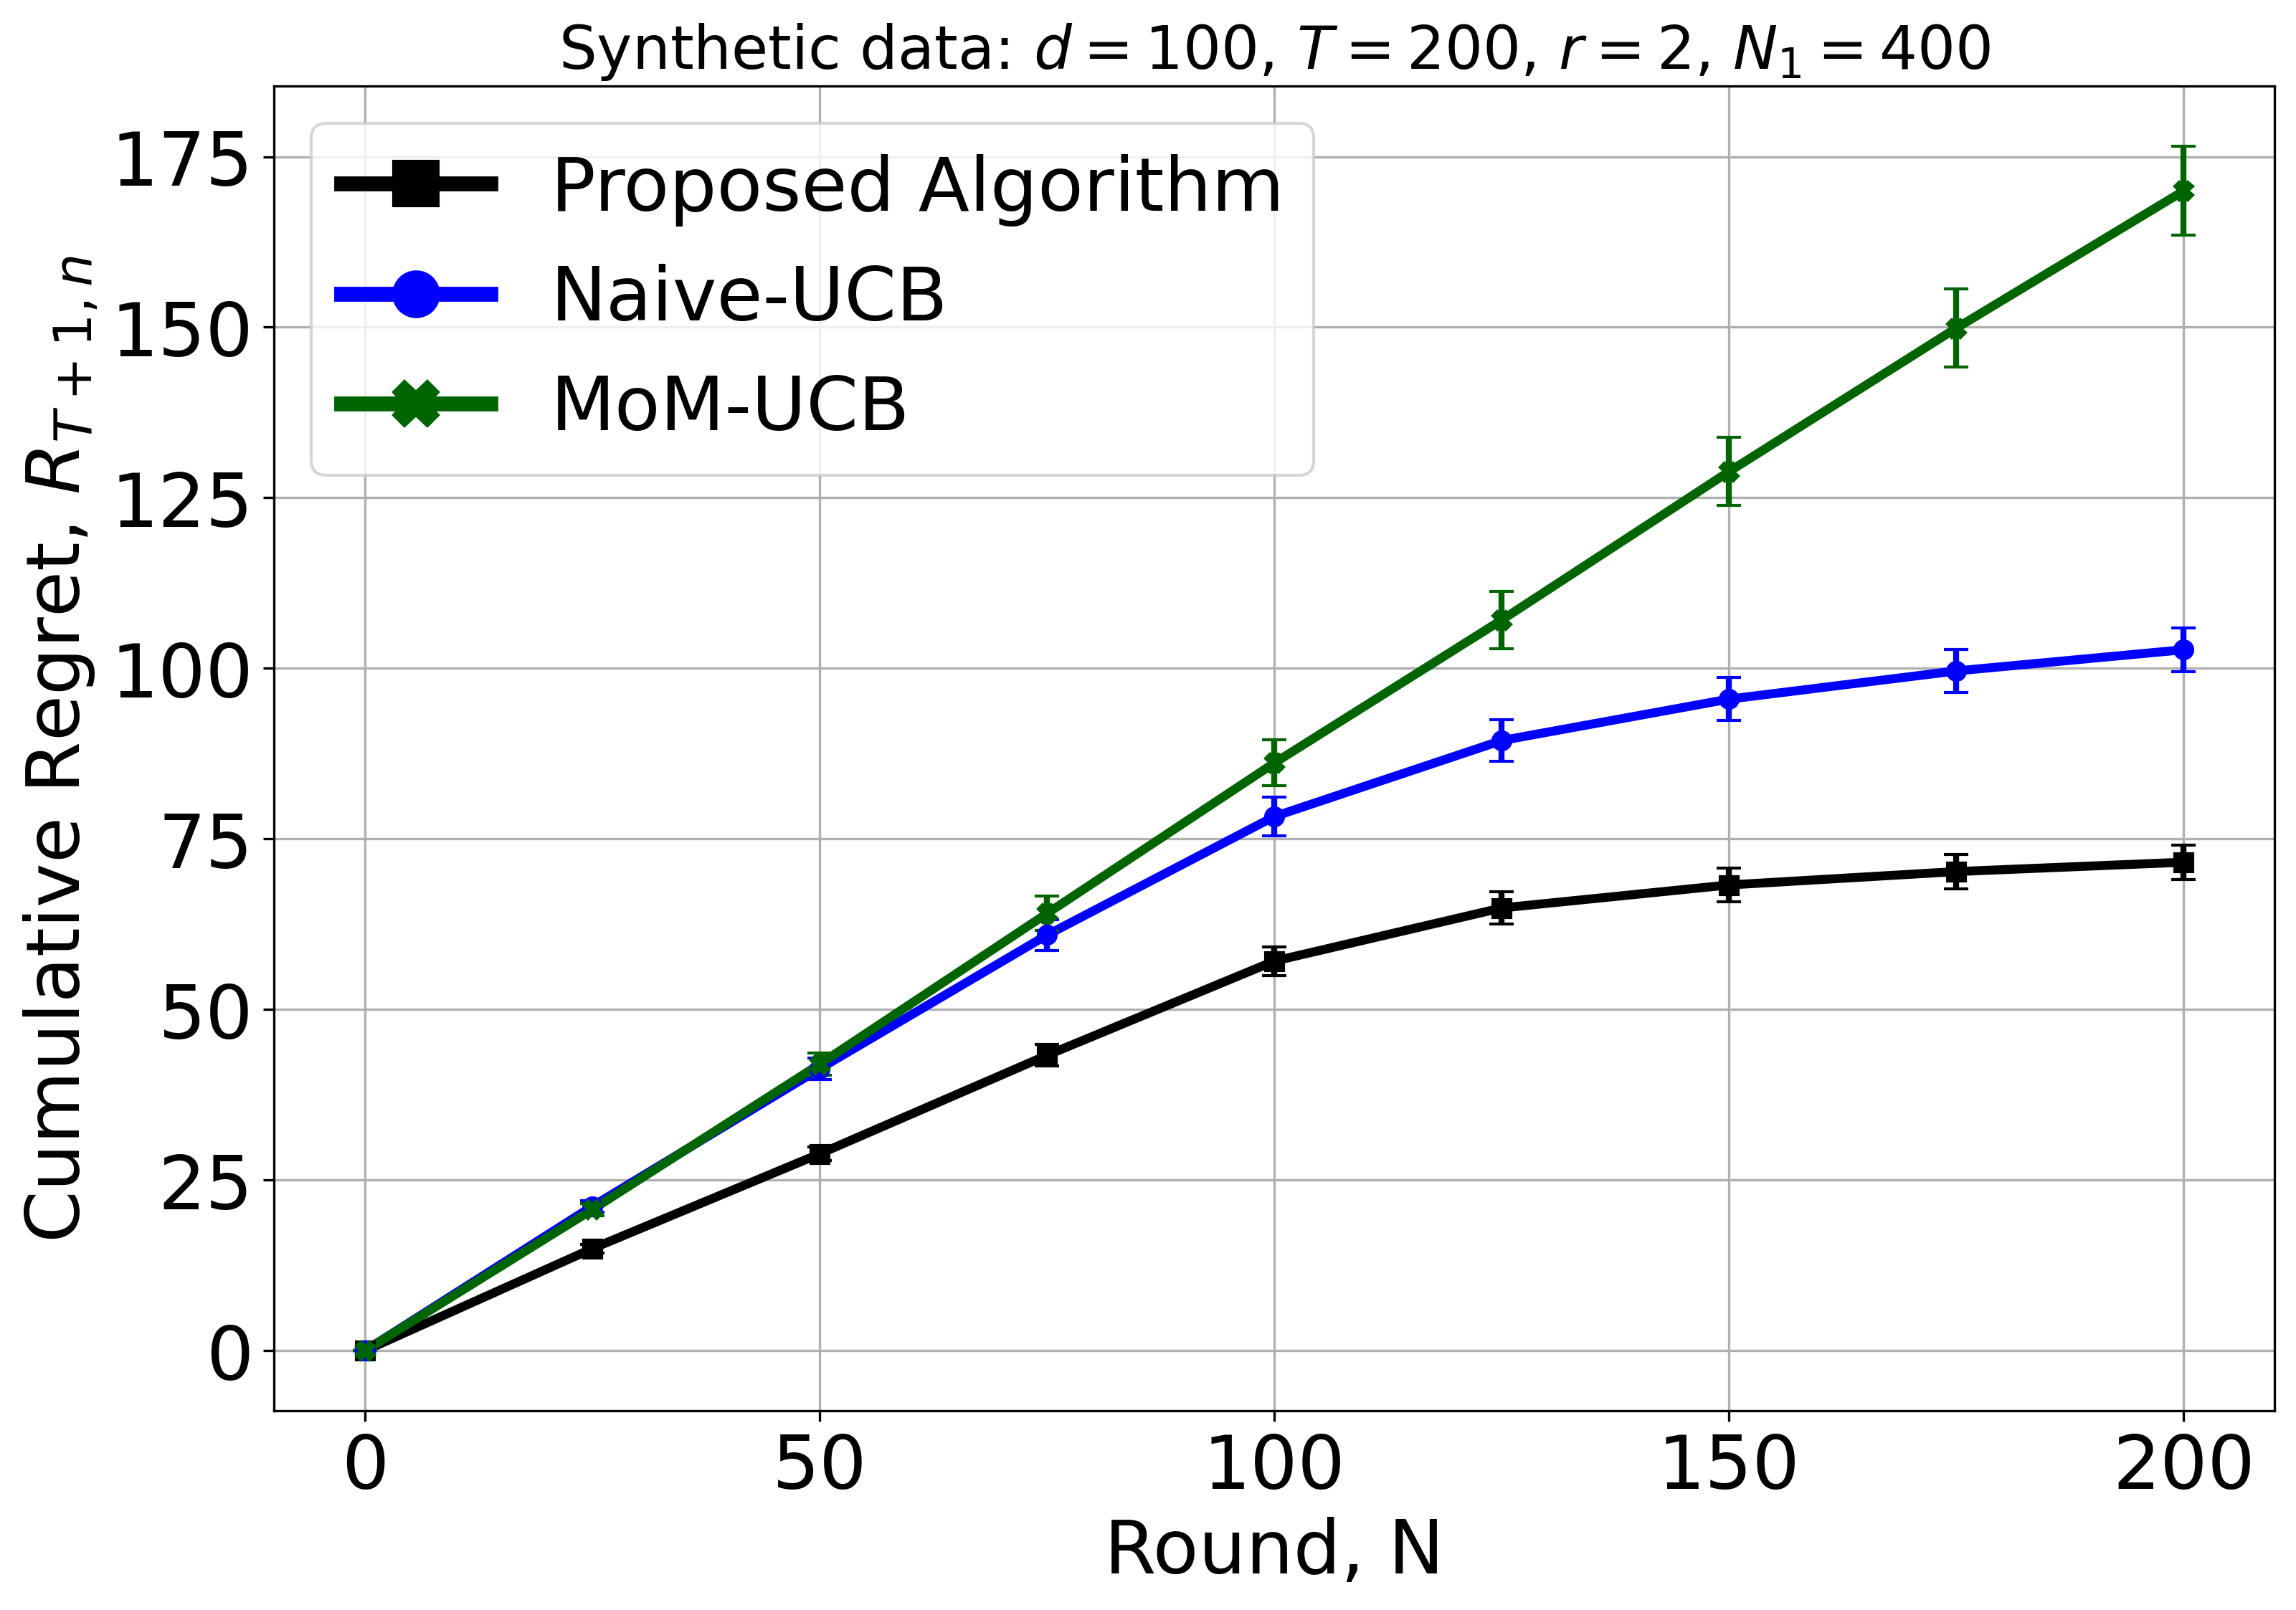

In [8]:
plt.figure(figsize=(12, 8), dpi = 300)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

colors = (['black', 'blue', 'darkgreen', 'purple', 'darkred', 'grey'])
markers = ['*', 's', 'o', 'X', '^', 'P']

plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rc('legend', fontsize = 25)

plt.plot(x[::every_point], y_Proposed[::every_point], color = colors[0], linewidth = 3, label = 'Proposed Algorithm')
plt.errorbar(x[::every_point], y_Proposed[::every_point], yerr = std_Proposed[::every_point], label = 'Proposed Algorithm', fmt = markers[1], color = colors[0], ecolor = colors[0], elinewidth = 2, capsize = 4)
plt.plot(x[::every_point], y_Abbasi[::every_point], color = colors[1], linewidth = 3, label = 'Abbasi et al., 2011')
plt.errorbar(x[::every_point], y_Abbasi[::every_point], yerr = std_Abbasi[::every_point], label = 'Abbasi et al., 2011', fmt = markers[2], color = colors[1], ecolor = colors[1], elinewidth = 2, capsize = 4)
plt.plot(x[::every_point], y_MOM[::every_point], color = colors[2], linewidth = 3, label = 'MOM')
plt.errorbar(x[::every_point], y_MOM[::every_point], yerr = std_MOM[::every_point], label = 'MOM', fmt = markers[3], color = colors[2], ecolor = colors[2], elinewidth = 2, capsize = 4)

legend_elements = [mlines.Line2D([0], [0], color = colors[0], lw = 5, label = 'Proposed Algorithm', marker = markers[1], markersize = 15),
                   mlines.Line2D([0], [0], color = colors[1], lw = 5, label = 'Naive-UCB', marker = markers[2], markersize = 15),
                   mlines.Line2D([0], [0], color = colors[2], lw = 5, label = 'MoM-UCB', marker = markers[3], markersize = 15)]

plt.grid(True)
plt.xlabel('Round, N', fontsize = 25)
plt.ylabel(r'Cumulative Regret, $R_{T+1,n}$', fontsize = 25)
plt.legend(handles=legend_elements)
plt.title(r'Synthetic data: $d=100$, $T=200$, $r=2$, $N_1=400$', fontsize = 20)
plt.savefig('meta_Synthetic_error_bar.pdf', dpi = 600, bbox_inches = 'tight')
plt.show()
plt.close()